In [50]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ortho_group # Used for random rotation of covariance matrix
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn_extra.cluster import KMedoids

In [3]:
config= pd.read_csv('../bucket/config/config.csv',index_col=0)
embeddings_without_ChatGPT_path=config.loc['iphone6_embeddings_dataset_without_ChatGPT'][0]
X_emb= pd.read_csv(embeddings_without_ChatGPT_path,index_col=0)
X_emb

,0,1,2,3,4,5,6,7,8,9,...,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535
0,-0.016837,-0.009745,0.010138,-0.021534,-0.000880,0.011593,-0.037843,-0.002905,-0.007329,-0.001585,...,0.013460,-0.019964,0.037979,-0.026975,-0.018665,0.042499,-0.032348,-0.025811,0.014090,-0.028098
1,-0.009223,0.003645,-0.018278,-0.020371,-0.017790,0.013200,-0.033320,-0.003718,-0.020846,-0.028478,...,0.011365,-0.030529,0.041050,-0.018669,-0.027181,0.003164,-0.016562,-0.019632,0.001014,-0.023804
2,-0.016064,0.003222,0.007999,-0.026997,-0.015285,0.012310,-0.008106,-0.000991,0.001728,-0.013532,...,-0.002992,-0.029523,0.017286,-0.043115,-0.023666,0.009019,-0.009080,0.001371,0.007011,-0.026715
3,-0.027700,-0.004357,0.001510,-0.017028,0.009624,-0.000192,-0.035545,-0.010734,0.000684,-0.012009,...,-0.005208,-0.035573,0.038799,-0.025383,-0.014932,0.038110,-0.011471,-0.024722,0.002554,-0.025066
4,-0.028545,-0.010588,-0.011517,-0.039148,-0.015369,0.012543,-0.032933,-0.009836,-0.009963,-0.040695,...,0.023272,-0.011770,0.023610,-0.045448,-0.030233,0.015693,-0.007481,-0.006430,0.011256,-0.027238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,-0.023055,-0.005153,-0.005132,-0.026010,-0.003420,0.032830,-0.045641,-0.014289,-0.005653,-0.006927,...,0.010292,-0.032333,0.039401,-0.038849,-0.044399,0.033437,-0.016760,-0.019894,0.001972,-0.026355
3496,-0.022825,0.005792,-0.023225,-0.025265,-0.019801,0.012547,-0.021927,-0.005360,-0.016292,-0.020086,...,0.016605,-0.041029,0.028974,-0.029131,-0.026620,0.040201,-0.008995,-0.028560,0.015593,-0.016149
3497,-0.026935,-0.005614,-0.003453,-0.037434,-0.003752,0.020755,-0.014817,-0.008819,0.002262,-0.023683,...,0.013171,-0.026463,0.037272,-0.034789,-0.038001,0.034924,-0.003478,-0.023359,0.008826,-0.009521
3498,-0.027652,0.005769,0.015298,-0.030191,-0.006373,0.019875,-0.020091,0.006582,0.014839,-0.017890,...,0.005097,-0.028868,0.023791,-0.026572,-0.027450,0.037239,-0.002896,0.009283,0.006775,-0.028273


In [14]:
y = pd.read_csv(config.loc['iphone6_y_test'][0])
X_train = pd.read_csv(config.loc['iphone6_x_test'][0],index_col=0)
X_train=X_train.iloc[list(y.query('label==1').index)]
X = X_emb.loc[X_train.index]
y=y.query('label==1')

In [15]:
pca = PCA() # Initialize with n_components parameter to only find the top eigenvectors
z = pca.fit_transform(X)

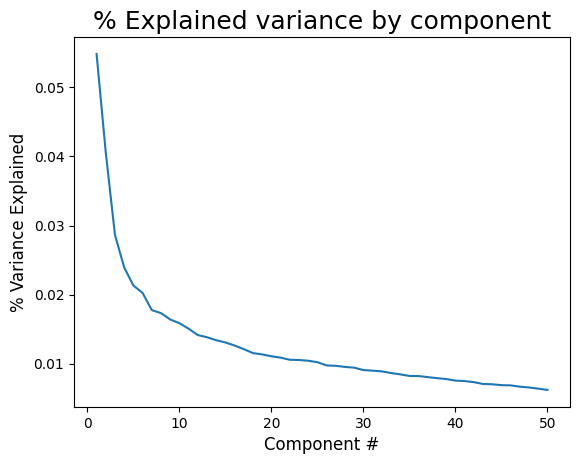

In [16]:
plt.plot(np.arange(1,51),pca.explained_variance_ratio_[0:50])
plt.title("% Explained variance by component",size=18)
plt.xlabel("Component #",size=12)
plt.ylabel("% Variance Explained",size=12)
plt.show()

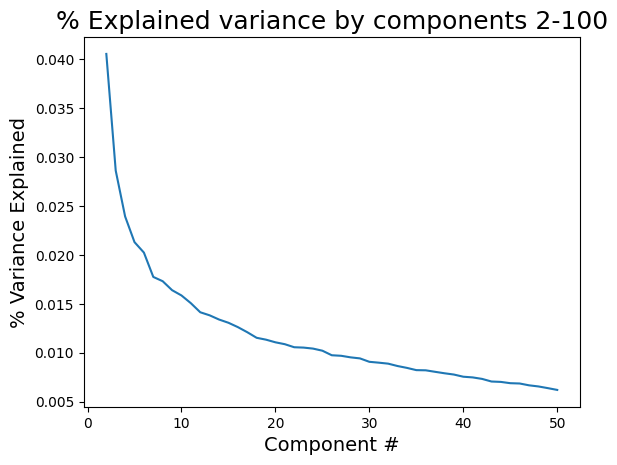

In [17]:
plt.plot(np.arange(2,51),pca.explained_variance_ratio_[1:50])
plt.title("% Explained variance by components 2-100",size=18)
plt.xlabel("Component #",size=14)
plt.ylabel("% Variance Explained",size=14)
plt.show()

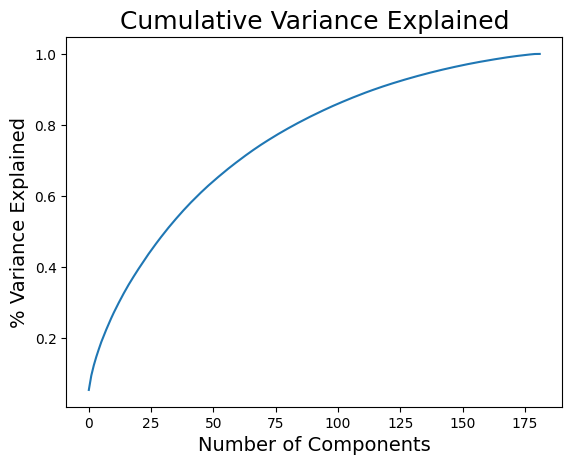

In [19]:
plt.plot(np.arange(0,y.shape[0]),np.cumsum(pca.explained_variance_ratio_[0:y.shape[0]]))
plt.title("Cumulative Variance Explained",size=18)
plt.xlabel("Number of Components",size=14)
plt.ylabel("% Variance Explained",size=14)
plt.show()

In [33]:
min_feat_past_threshold=np.where(np.cumsum(pca.explained_variance_ratio_) >=.95)[0][0]

/home/oneking/Documents/Github_Projects/twitter_pf_NLP/venv/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


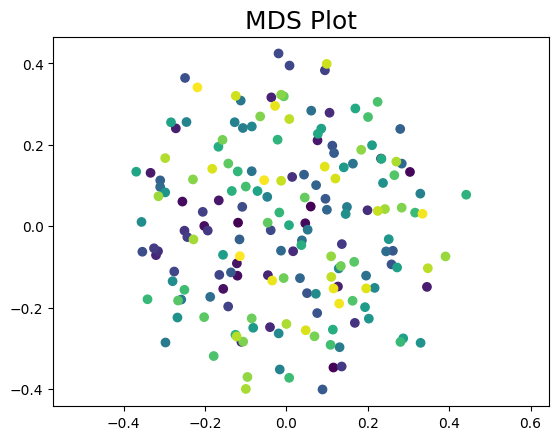

In [34]:
# MDS can be slow when n is large
mds = MDS(n_components=4,verbose=1,eps=1e-5)
mds.fit(X)
plt.scatter(mds.embedding_[:,0],mds.embedding_[:,1],c=np.arange(y.shape[0]))
plt.title("MDS Plot",size=18)
plt.axis("equal")
plt.show()

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 182 samples in 0.001s...
[t-SNE] Computed neighbors for 182 samples in 0.024s...
[t-SNE] Computed conditional probabilities for sample 182 / 182
[t-SNE] Mean sigma: 0.109303
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.677814
[t-SNE] KL divergence after 1000 iterations: 1.058702


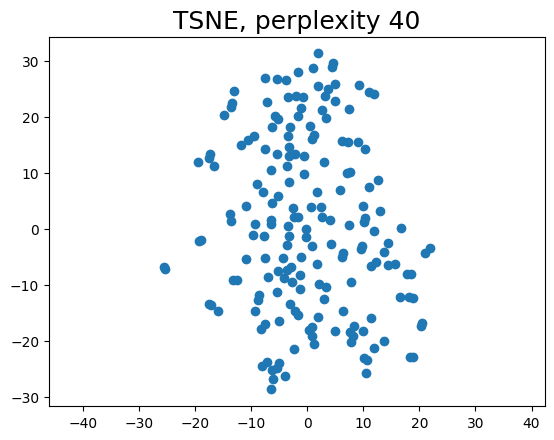

In [35]:
tsne = TSNE(n_components=2,verbose=1,perplexity=10, learning_rate=10)
z_tsne = tsne.fit_transform(X)
plt.scatter(z_tsne[:,0],z_tsne[:,1])
plt.title("TSNE, perplexity 40",size=18)
plt.axis("equal")
plt.show()

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 182 samples in 0.000s...
[t-SNE] Computed neighbors for 182 samples in 0.014s...
[t-SNE] Computed conditional probabilities for sample 182 / 182
[t-SNE] Mean sigma: 0.144177
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.428169
[t-SNE] KL divergence after 1000 iterations: 0.749230


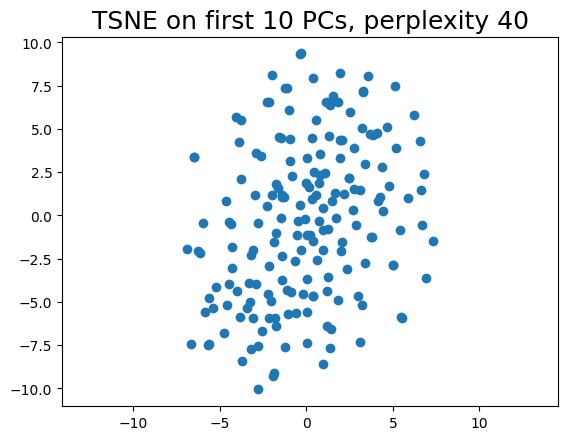

In [36]:
tsne = TSNE(n_components=2,verbose=1,perplexity=40)
z_tsne = tsne.fit_transform(z[:,0:min_feat_past_threshold])
plt.scatter(z_tsne[:,0],z_tsne[:,1])
plt.title("TSNE on first 10 PCs, perplexity 40",size=18)
plt.axis("equal")
plt.show()

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 182 samples in 0.000s...
[t-SNE] Computed neighbors for 182 samples in 0.022s...
[t-SNE] Computed conditional probabilities for sample 182 / 182
[t-SNE] Mean sigma: 0.129149
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.034416
[t-SNE] KL divergence after 1000 iterations: 0.971038


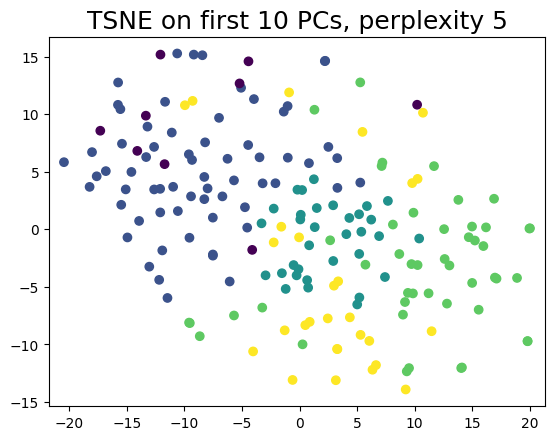

In [76]:
tsne = TSNE(n_components=2,verbose=1,perplexity=20)
z_tsne = tsne.fit_transform(z[:,0:min_feat_past_threshold])
plt.scatter(z_tsne[:,0],z_tsne[:,1],c=y)
plt.title("TSNE on first 10 PCs, perplexity 5",size=18)
plt.axis("equal")
plt.show()

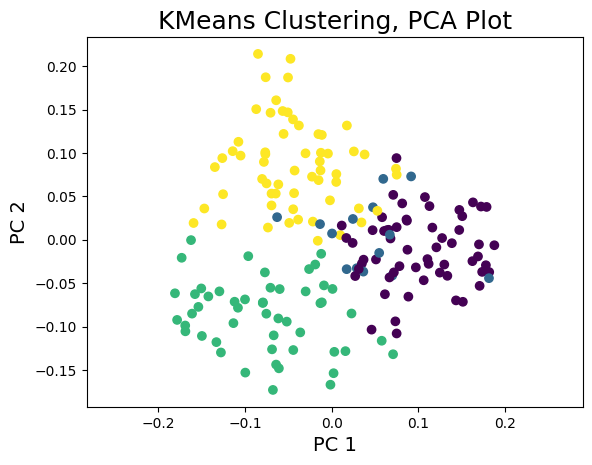

In [38]:
kmeans = KMeans(n_clusters=4,n_init=10)
y = kmeans.fit_predict(X)
plt.scatter(z[:,0],z[:,1],c=y)
plt.title("KMeans Clustering, PCA Plot",size=18)
plt.xlabel("PC 1",size=14)
plt.ylabel("PC 2",size=14)
plt.axis("equal")
plt.show()

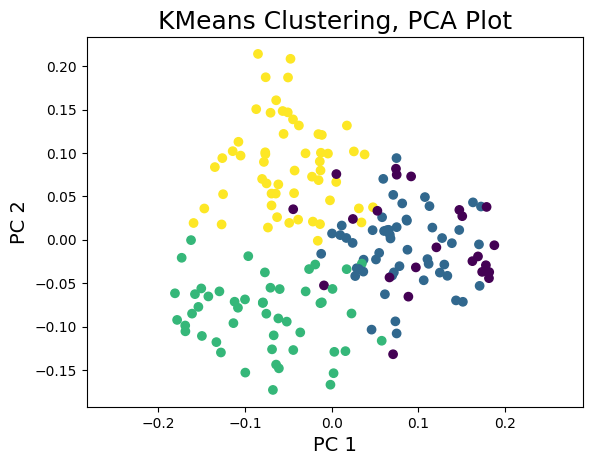

In [39]:
# More initializations
kmeans = KMeans(n_clusters=4,n_init=100)
y = kmeans.fit_predict(z)
plt.scatter(z[:,0],z[:,1],c=y)
plt.title("KMeans Clustering, PCA Plot",size=18)
plt.xlabel("PC 1",size=14)
plt.ylabel("PC 2",size=14)
plt.axis("equal")
plt.show()

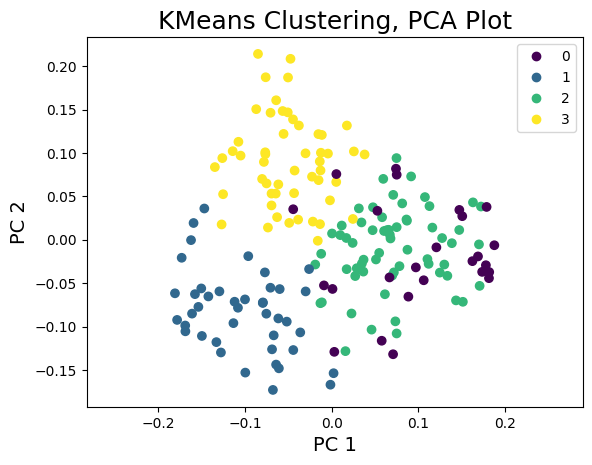

['mad af i could not get the iphone 6',
 'duh of course the iphone 6 plus can bend in your pocket httpwrdcm1pdcb1h',
 'the iphone 6 is so big in person i am not really sure why they made a 61',
 'old openingweekend record bites dust as iphone 6 cracks 10 million httpbitly1svmkgl']

In [68]:
# Reduced dimension
kmeans = KMeans(n_clusters=4,n_init=100)
y = kmeans.fit_predict(z[:,0:min_feat_past_threshold])
centers=kmeans.cluster_centers_
scatter=plt.scatter(z[:,0],z[:,1],c=y)
plt.legend(handles=scatter.legend_elements()[0],labels=set(y))
plt.title("KMeans Clustering, PCA Plot",size=18)
plt.xlabel("PC 1",size=14)
plt.ylabel("PC 2",size=14)
plt.axis("equal")
plt.show()
ps_centroids=[]
for i,item in enumerate(centers.tolist()):
    # print(item)
    prev=float('infinity')
    min_j=0
    for j,post in enumerate(z[:,0:min_feat_past_threshold].tolist()):
        # print(item[:5],'|',post[:5])
        diff=np.sum((centers[i]-z[j,0:min_feat_past_threshold])**2)
        diff=min(diff,prev)
        if diff!=prev:
            min_j=j
        prev=diff
    ps_centroids.append(min_j)
X_train.iloc[ps_centroids].text.tolist()

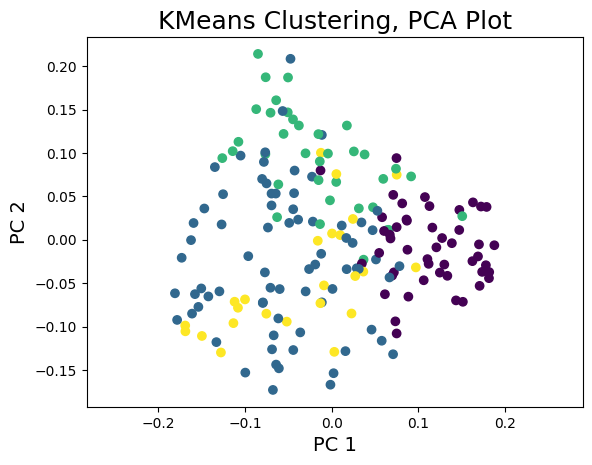

In [31]:
kmed = KMedoids(n_clusters=4,max_iter=1000,init='k-medoids++')
y = kmed.fit_predict(z[:,:])
centers=kmed.cluster_centers_
plt.scatter(z[:,0],z[:,1],c=y)
plt.title("KMeans Clustering, PCA Plot",size=18)
plt.xlabel("PC 1",size=14)
plt.ylabel("PC 2",size=14)
plt.axis("equal")
plt.show()

EM clustering is a more versatile clustering algorithm that can adapt to non-spherical clusters, which I think makes the most sense when dealing with something non-uniform such as natural language embeddings. 

read: https://www.linkedin.com/pulse/clustering-k-means-vs-em-basics-venki-manoharan/

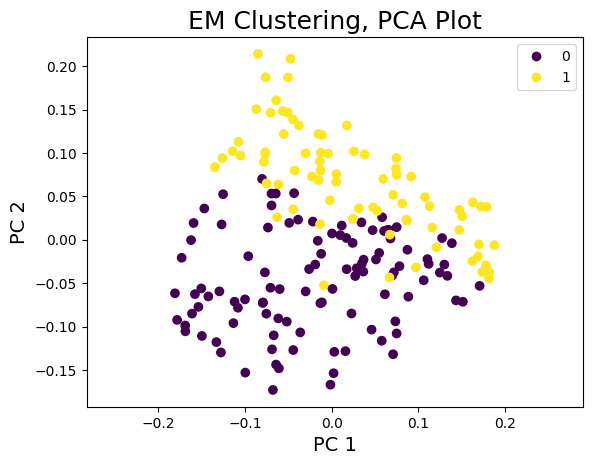

['duh of course the iphone 6 plus can bend in your pocket httpwrdcm1pdcb1h', 'old openingweekend record bites dust as iphone 6 cracks 10 million httpbitly1svmkgl']


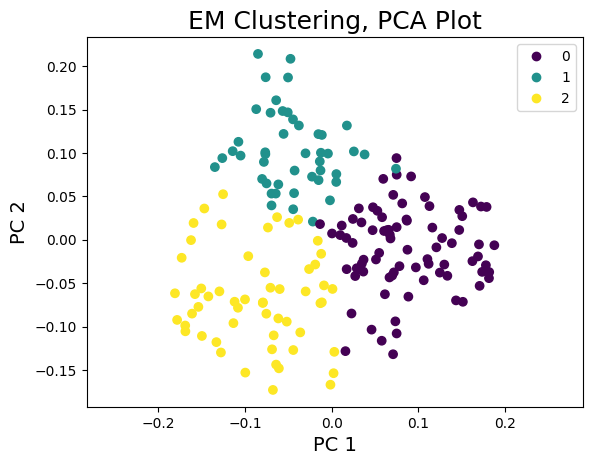

['the iphone 6 is so big in person i am not really sure why they made a 61', 'old openingweekend record bites dust as iphone 6 cracks 10 million httpbitly1svmkgl', 'duh of course the iphone 6 plus can bend in your pocket httpwrdcm1pdcb1h']


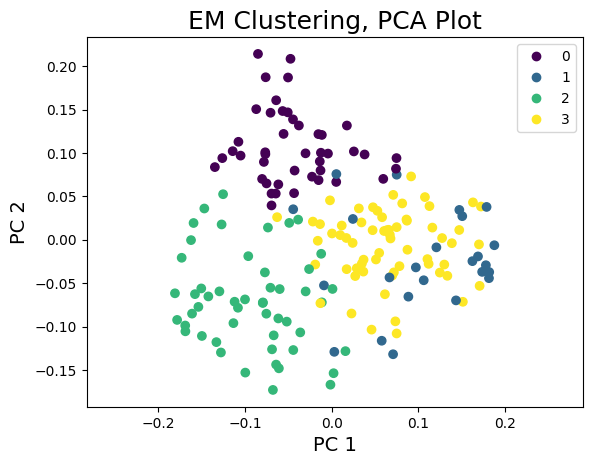

['old openingweekend record bites dust as iphone 6 cracks 10 million httpbitly1svmkgl', 'mad af i could not get the iphone 6', 'duh of course the iphone 6 plus can bend in your pocket httpwrdcm1pdcb1h', 'the iphone 6 is so big in person i am not really sure why they made a 61']


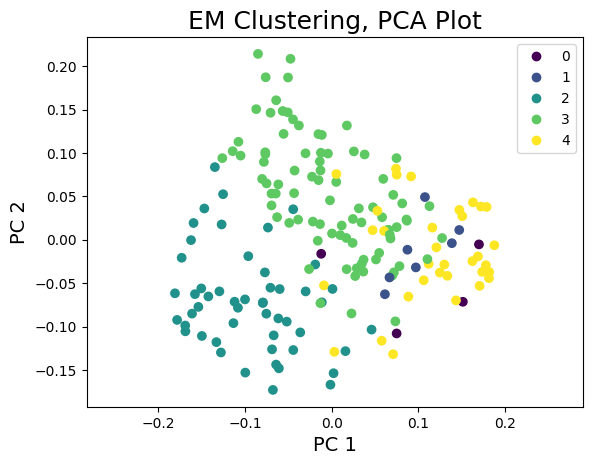

['bae at att sneaked dissed me and said are you sure the iphone 6 plus will fit in those skinny jeans ', 'on my new iphone 6 so much bigger than my 4s lol its going to hurt when i accidentally drop it on my face ', 'duh of course the iphone 6 plus can bend in your pocket httpwrdcm1pdcb1h', 'duh of course the iphone 6 plus can bend in your pocket httpwrdcm1pdcb1h', 'mad af i could not get the iphone 6']


In [77]:
for i in range(2,6):
    em=GaussianMixture(n_components=i, tol=0.000001)
    y = em.fit_predict(z[:,0:min_feat_past_threshold])
    centers=em.means_
    scatter=plt.scatter(z[:,0],z[:,1],c=y)
    plt.legend(handles=scatter.legend_elements()[0],labels=set(y))
    plt.title("EM Clustering, PCA Plot",size=18)
    plt.xlabel("PC 1",size=14)
    plt.ylabel("PC 2",size=14)
    plt.axis("equal")
    plt.show()
    ps_centroids=[]
    for i,item in enumerate(centers.tolist()):
        # print(item)
        prev=float('infinity')
        min_j=0
        for j,post in enumerate(z[:,0:min_feat_past_threshold].tolist()):
            # print(item[:5],'|',post[:5])
            diff=np.sum((centers[i]-z[j,0:min_feat_past_threshold])**2)
            diff=min(diff,prev)
            if diff!=prev:
                min_j=j
            prev=diff
        ps_centroids.append(min_j)
    print(X_train.iloc[ps_centroids].text.tolist())